1.8119250282752437
1.8058069528009766
1.800529796551863
1.8165255049237354
1.8234029534804888
1.8299654637455471
1.8413306037460024
1.8488295774428332
1.8611055197243263
1.8772207227236035
1.8955957994119461
1.890966680434919
1.9059544895903555
1.8935049481311912
1.920222044775568
1.9329785949773464
1.9243483234495276
1.9575805928382073
1.975816820427029
1.9548392977562994
1.98935777095558
1.986858066400014
1.9920052577906224
1.9677477008417694
1.99726191210034
1.97696528389579
1.9808259422072054
1.9980224294032611
1.9783631468664693
1.999014147542578
1.9899993070769795
1.9996483893080896
1.9984217948484646
1.9996110064003396
1.9983403876740353
1.9998048897417477
1.999368942164341
1.9999272626225941
1.9984834553866406
1.9999802620379088
1.9997791607678306
1.9999455768515328
1.999969226194904
1.9997578551531994
1.9999964107305983
1.9999781260763905
1.9999943770317512
1.9999653108870112
1.9999960062476592
1.999995118500544
1.9999988672599522
1.9999796885903673
1.9999998094193931
1.999995

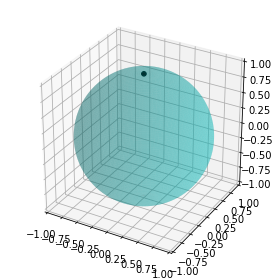

array([-8.58657364e-06, -1.67597364e-10,  1.00000000e+00])

In [21]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
pi = np.pi
sin = np.sin
cos = np.cos

N = 1


def W(tocke):
    """Izračuna coulombsko energijo točk, upošteva, da so točke 
    v polarni obliki in imajo samo 2 koordinati,
    upošteva tudi fiksno točko na vrhu sfere.
    
    Predvideva, da so tocke array shapa (N,)"""
    energija = 0
    dolzina = len(tocke)
    tocke = tocke.reshape(dolzina//2,2)
    tocke = np.concatenate((tocke, np.array([[pi, 0]])))
    #print("Len(tocke) = ", len(tocke))
    #print("tocke.shape = ", tocke.shape)
    for i in range(tocke.shape[0]):
        for j in range(i):
            t1, f1 = tocke[i]
            t2, f2 = tocke[j]
            razdalja = np.sqrt(2-2*cos(t1)*cos(t2)*cos(f1-f2)-2*sin(t1)*sin(t2))
            energija += 1/razdalja
            print(razdalja)
            
    return energija

theta0 = np.random.uniform(low =0, high = pi, size = N)
fi0 = np.random.uniform(low=0, high=2*pi, size = N)

x0 = np.array([theta0, fi0])
x0 = x0.T.reshape(-1)
#To je naš vektor začetnih ugibov v obliki (theta, fi)

Res = minimize(W, x0=x0, method= "Nelder-Mead")
W(Res.x)

def karteziraj(array):
    """Dobi array shapa (2N,) in ga transformira v kartezične koordinate (x,y,z) shapa (N, 3).
    Doda tudi točko na severnem polu."""
    N = array.shape[0]//2
    array = array.reshape(N,2)
    N = array.shape[0]
    res = np.array([])
    for item in array:
        t,f = item
        x = sin(t)*cos(f)
        y = sin(t)*sin(f)
        z = cos(t)
        res = np.concatenate((res, np.array([x,y,z])))
    res = np.concatenate((res, np.array([0,0,1])))
    return res.reshape(N+1,3)

kartarray = karteziraj(Res.x)

xx = kartarray[:,0]
yy = kartarray[:,1]
zz = kartarray[:,2]


# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)


#Set colours and render
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

ax.scatter(xx,yy,zz,color="k",s=20)

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_aspect("equal")
plt.tight_layout()
plt.show()
np.mean(karteziraj(Res.x), axis = 0)


In [10]:
karteziraj(Res.x)

array([[ 0.05273801, -0.14709866,  0.98771488],
       [-0.3529844 , -0.63563276, -0.68656609],
       [ 0.62816791,  0.6210237 , -0.46875862],
       [ 0.        ,  0.        ,  1.        ]])

In [11]:
np.mean(karteziraj(Res.x), axis = 0)


array([ 0.08198038, -0.04042693,  0.20809754])

In [15]:
np.mean(np.array([[
    1,1,0],
    [1,0,0],
    [0,0,0]
]), axis=0)

array([0.66666667, 0.33333333, 0.        ])

In [21]:
t1,f1 = (0,0)
t2,f2 = (0, 0)
np.sqrt(2-2*cos(t1)*cos(t2)*cos(f1-f2)-2*sin(t1)*sin(t2))

0.0

In [18]:
karteziraj(np.array([0,0]))

array([[0., 0., 1.],
       [0., 0., 1.]])